<a href="https://colab.research.google.com/github/MMM2HH/M2H-CIND820/blob/main/Research_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Exploration & Pre-processing**

In [1]:
#https://www.udacity.com/blog/2020/04/python-and-data-analysis-cheat-sheet.html
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import rpy2
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
df = pd.read_csv('ExportedSubsetData.csv')
#Print data frame
df
#Dataset Info Summary
df.info()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            50000 non-null  int64  
 1   type            50000 non-null  object 
 2   amount          50000 non-null  float64
 3   nameOrig        50000 non-null  object 
 4   oldbalanceOrg   50000 non-null  float64
 5   newbalanceOrig  50000 non-null  float64
 6   nameDest        50000 non-null  object 
 7   oldbalanceDest  50000 non-null  float64
 8   newbalanceDest  50000 non-null  float64
 9   isFraud         50000 non-null  int64  
 10  isFlaggedFraud  50000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 4.2+ MB


In [2]:
#Statistical Summary of Numeric Variables - Sample Dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,50000.0
mean,243.140540,1.862960e+05,8.612681e+05,8.824226e+05,1.124943e+06,1.253782e+06,0.001360,0.0
std,142.194128,6.793675e+05,2.952606e+06,2.989308e+06,3.298256e+06,3.602902e+06,0.036853,0.0
min,1.000000,1.970000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,155.000000,1.360874e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,238.000000,7.638024e+04,1.442752e+04,0.000000e+00,1.459809e+05,2.251965e+05,0.000000,0.0
75%,334.000000,2.086110e+05,1.096545e+05,1.502079e+05,9.704811e+05,1.134654e+06,0.000000,0.0
max,742.000000,4.218381e+07,4.381886e+07,4.368662e+07,1.569947e+08,1.571410e+08,1.000000,0.0


In [3]:
#Convert categorical variable "type" into dummy variables: 
#https://stackoverflow.com/questions/44694228/how-to-check-for-correlation-among-continuous-and-categorical-variables
df_dummies = pd.get_dummies(df['type'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([df, df_dummies], axis=1)
del df_new['type']
df_new


,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT
0,182,129804.96,C557034178,0.00,0.00,C823541396,4225880.68,4355685.64,0,0,0,1,0,0
1,347,31443.09,C106157646,523617.58,492174.49,M1964962587,0.00,0.00,0,0,0,0,0,1
2,37,37045.02,C2119144137,563001.93,600046.95,C1617537788,1276384.02,1109350.62,0,0,1,0,0,0
3,321,54229.95,C1783369537,0.00,54229.95,C1462363253,205541.10,151311.15,0,0,1,0,0,0
4,252,61214.57,C680060894,0.00,0.00,C534934221,364102.11,425316.68,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,380,10534.48,C120732296,0.00,0.00,M1915420007,0.00,0.00,0,0,0,0,0,1
49996,402,32294.97,C1902387221,17712.00,50006.97,C1964108523,117531.60,85236.59,0,0,1,0,0,0
49997,165,81109.38,C1587276247,23905.07,0.00,C174210259,1501333.00,1582443.00,0,0,0,1,0,0
49998,258,17050.46,C1571710982,32554.77,15504.31,M1926601839,0.00,0.00,0,0,0,0,0,1


In [4]:
# Convert class variables type to object
df['isFraud'] = df['isFraud'].astype('object')
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            50000 non-null  int64  
 1   type            50000 non-null  object 
 2   amount          50000 non-null  float64
 3   nameOrig        50000 non-null  object 
 4   oldbalanceOrg   50000 non-null  float64
 5   newbalanceOrig  50000 non-null  float64
 6   nameDest        50000 non-null  object 
 7   oldbalanceDest  50000 non-null  float64
 8   newbalanceDest  50000 non-null  float64
 9   isFraud         50000 non-null  object 
 10  isFlaggedFraud  50000 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 4.2+ MB


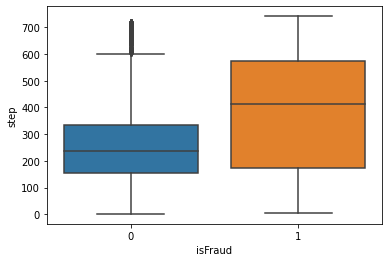

In [ ]:
ax = sns.boxplot(x="isFraud", y="step", data=df)

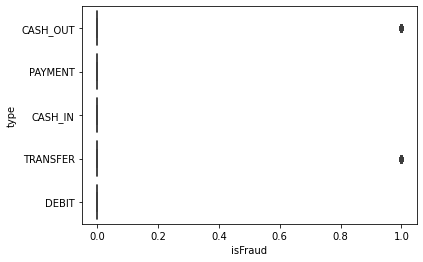

In [ ]:
#Boxplot grouped by categorical variables
ax = sns.boxplot(x="isFraud", y="type", data=df)

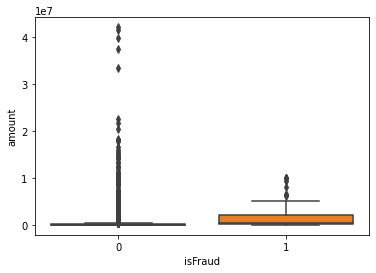

In [ ]:
ax = sns.boxplot(x="isFraud", y="amount", data=df)

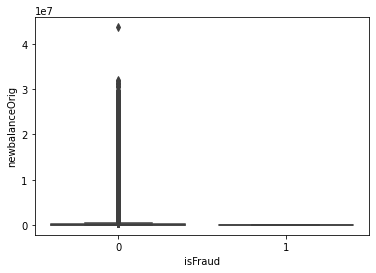

In [ ]:
ax = sns.boxplot(x="isFraud", y="newbalanceOrig", data=df)

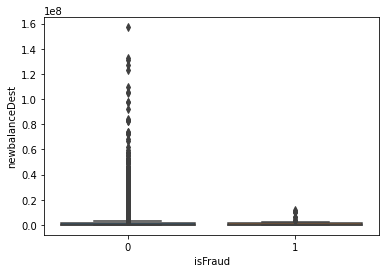

In [ ]:
ax = sns.boxplot(x="isFraud", y="newbalanceDest", data=df)

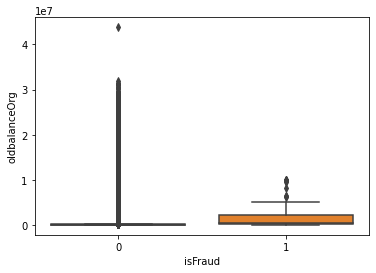

In [ ]:
ax = sns.boxplot(x="isFraud", y="oldbalanceOrg", data=df)

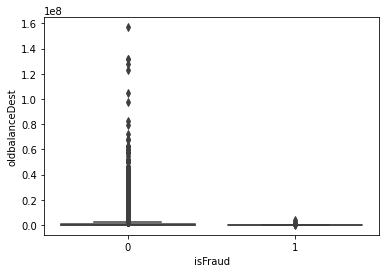

In [ ]:
ax = sns.boxplot(x="isFraud", y="oldbalanceDest", data=df)

In [ ]:
print("1. What are the types for fraud transactions? \n\n Answer: {}".\
      format(df.type.drop_duplicates().values))

1. What are the types for fraud transactions? 

 Answer: ['CASH_OUT' 'PAYMENT' 'CASH_IN' 'TRANSFER' 'DEBIT']


In [ ]:
#Create the Data Frame
ColumnNames=['CASH-OUT','AGE','GENDER' ,'SALARY', 'APPROVE_LOAN']
dfNEW=pd.DataFrame(data=df.isFraud,columns=df.type)
print(dfNEW.head())
#CrosstabResult = pd.crosstab(index=dfNEW['type'],columns=dfNEW['isFraud'])


Empty DataFrame
Columns: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]
Index: []

[0 rows x 50000 columns]


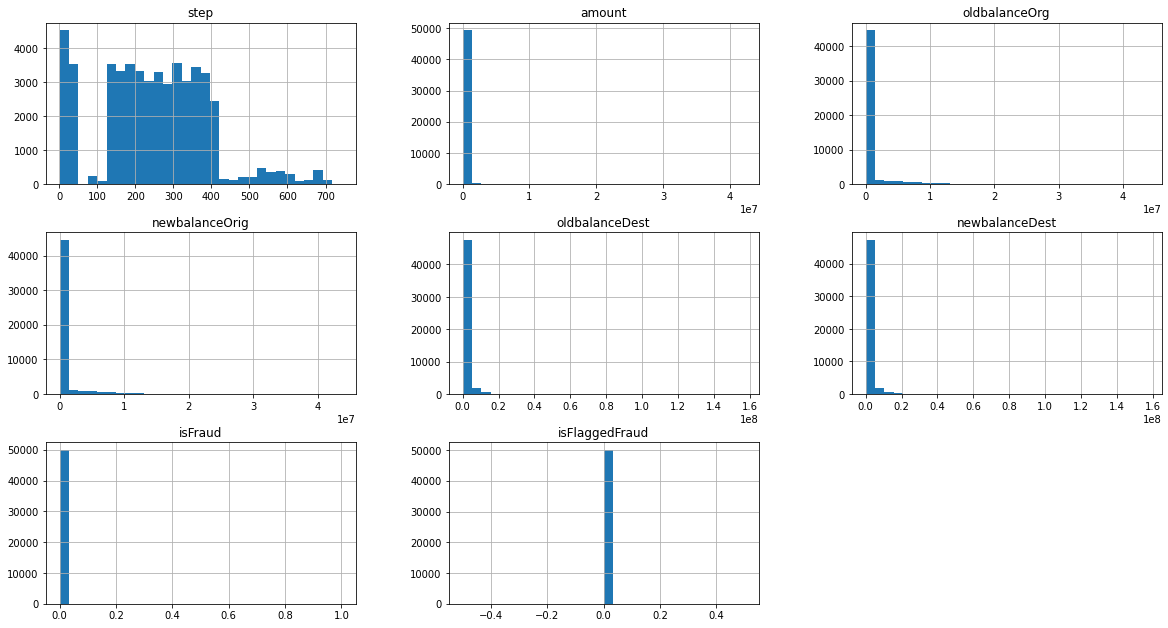

In [ ]:
# Visualize distributions
df.hist(bins=30, figsize=(20,30), layout=(8,3));

In [ ]:
#Data Normalization using the min-max method 
normalized_df = df.drop(['type','nameOrig','nameDest'], axis=1).copy()
for column in normalized_df.columns:
    normalized_df[column] = (normalized_df[column] - normalized_df[column].min())/(normalized_df[column].max() - normalized_df[column].min())

In [ ]:
#Transformation of Independent Variables with visually non-normal distributions 
normalized_df[['step', 
         'amount',
         'oldbalanceOrg',
         'newbalanceOrig',
         'oldbalanceDest',
         'newbalanceDest',
         'isFraud',
         'isFlaggedFraud']] = normalized_df[['step', 
         'amount',
         'oldbalanceOrg',
         'newbalanceOrig',
         'oldbalanceDest',
         'newbalanceDest',
         'isFraud',
         'isFlaggedFraud']].applymap(lambda x: np.log(1+x))

In [ ]:
normalized_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,0.0
mean,0.272351,0.004304,0.017657,0.018136,0.006952,0.007726,0.000943,NaN
std,0.144373,0.013601,0.057441,0.058289,0.018746,0.020274,0.025545,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.188823,0.000323,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.277509,0.001809,0.000329,0.000000,0.000929,0.001432,0.000000,NaN
75%,0.371145,0.004933,0.002499,0.003432,0.006163,0.007195,0.000000,NaN
max,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,NaN


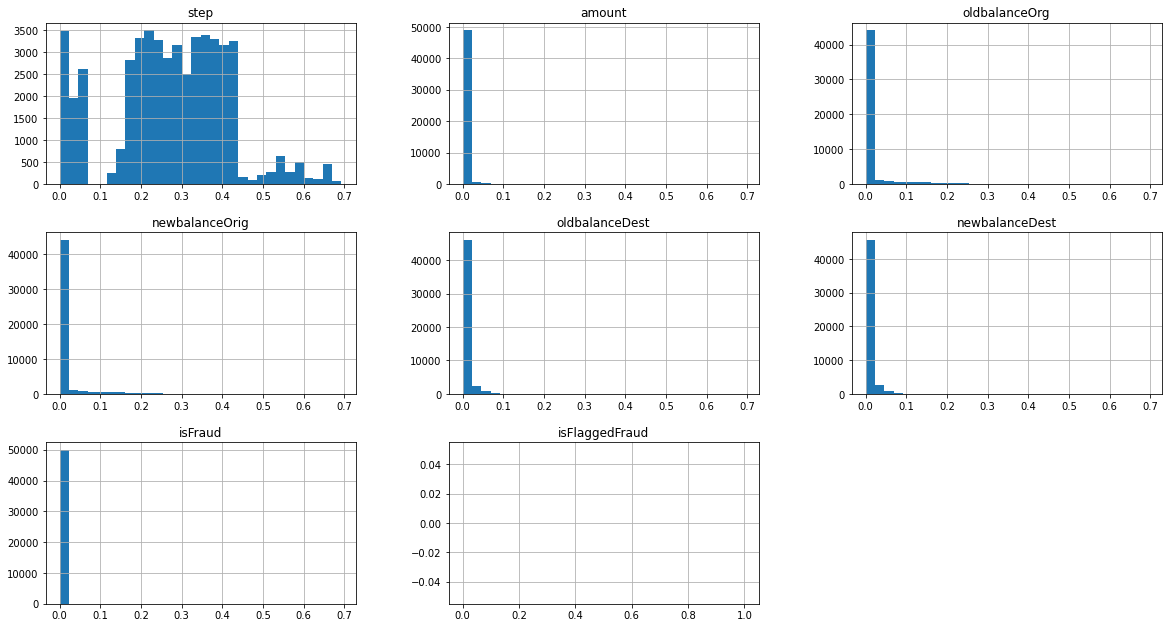

In [ ]:
# Visualize distributions
normalized_df.hist(bins=30, figsize=(20,30), layout=(8,3));

In [ ]:
#Summary of Statistics of Categorical Variables
from pandas import DataFrame
df1 = DataFrame(df, columns= ['type','nameOrig','nameDest','isFraud','isFlaggedFraud'])
stats = df1.describe(include='all')
print (stats)

            type    nameOrig   nameDest  isFraud  isFlaggedFraud
count      50000       50000      50000    50000           50000
unique         5       50000      48047        2               1
top     CASH_OUT  C557034178  C31789747        0               0
freq       17723           1          4    49932           50000


In [ ]:
#Missing Values Check
print('Maximum number of missing vlaues in any column: ' + str(df.isnull().sum().max()))

Maximum number of missing vlaues in any column: 0


In [ ]:
#Only evaluate number of unique categories, the most frequent category and its frequency
df['isFraud'].describe(include='all')

count     50000
unique        2
top           0
freq      49932
Name: isFraud, dtype: int64

In [ ]:
#Class Imbalance - Percentage Frequency
dFraud = pd.DataFrame(df, columns= ['isFraud'])
# Percentage calculation
(dFraud['isFraud'].value_counts()/dFraud['isFraud'].count())*100

0    99.864
1     0.136
Name: isFraud, dtype: float64

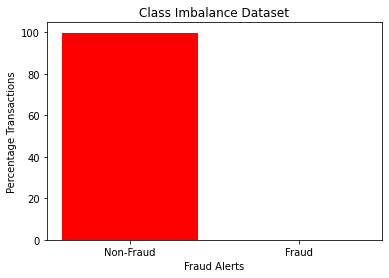

In [ ]:
# Histogram for Imbalance Data Visualization
import matplotlib.pyplot as plt
  
# x-coordinates of left sides of bars 
left = [1, 2]
  
# heights of bars
height = [99.864, 0.136]
  
# labels for bars
tick_label = ['Non-Fraud', 'Fraud']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
  
# naming the x-axis
plt.xlabel('Fraud Alerts')
# naming the y-axis
plt.ylabel('Percentage Transactions')
# plot title
plt.title('Class Imbalance Dataset')
  
# function to show the plot
plt.show()

In [ ]:
# Type of Transactions
df['type'].describe(include='all')
# Percentage Frequency-Type
dType = pd.DataFrame(df, columns= ['type'])
# Percentage calculation
#(dType['type'].value_counts()/dType['type'].count())*100
# Type - Count of Volume
(dType['type'].value_counts())

CASH_OUT    17723
PAYMENT     16665
CASH_IN     11129
TRANSFER     4156
DEBIT         327
Name: type, dtype: int64

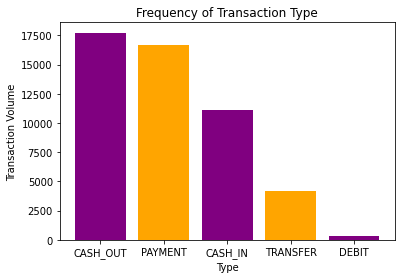

In [ ]:
# Histogram for Type
# x-coordinates of left sides of bars 
left = [1, 2, 3, 4, 5]
  
# heights of bars
height = [17723, 16665, 11129, 4156, 327]
  
# labels for bars
tick_label = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['purple','orange'])
  
# naming the x-axis
plt.xlabel('Type')
# naming the y-axis
plt.ylabel('Transaction Volume')
# plot title
plt.title('Frequency of Transaction Type')
  
# function to show the plot
plt.show()

In [ ]:
# Correlation Matrix
import pandas as pd
#df2 = pd.DataFrame(df, columns= ['type','isFraud'])
#corrMatrix = df2.corr()
#print (corrMatrix)

data = {'type','isFraud'
        }

df = pd.DataFrame(data,columns=['A','B','C'])

corrMatrix = df.corr()
print (corrMatrix)

          A         B         C
A  1.000000  0.518457 -0.701886
B  0.518457  1.000000 -0.860941
C -0.701886 -0.860941  1.000000


In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# PS_20174392719_1491204439457_log.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
cf = pd.read_csv('ExportedSubsetData.csv', delimiter=',', nrows = nRowsRead)
cf.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,182,CASH_OUT,129804.96,C557034178,0.00,0.00,C823541396,4225880.68,4355685.64,0,0
1,347,PAYMENT,31443.09,C106157646,523617.58,492174.49,M1964962587,0.00,0.00,0,0
2,37,CASH_IN,37045.02,C2119144137,563001.93,600046.95,C1617537788,1276384.02,1109350.62,0,0
3,321,CASH_IN,54229.95,C1783369537,0.00,54229.95,C1462363253,205541.10,151311.15,0,0
4,252,CASH_OUT,61214.57,C680060894,0.00,0.00,C534934221,364102.11,425316.68,0,0


In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
  plotPerColumnDistribution(df1, 10, 5)
  print(plotPerColumnDistribution)

In [ ]:
# https://datagy.io/python-correlation-matrix/ (Calculate and Plot a Correlation Matrix in Python and Pandas)
# Calculating a Correlation Matrix with Pandas
import pandas as pd

matrix = df.corr()
print(matrix)

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.024259      -0.016355       -0.017055   
amount          0.024259  1.000000      -0.002685       -0.010167   
oldbalanceOrg  -0.016355 -0.002685       1.000000        0.998519   
newbalanceOrig -0.017055 -0.010167       0.998519        1.000000   
oldbalanceDest  0.030215  0.295156       0.074079        0.075819   
newbalanceDest  0.029405  0.474885       0.048339        0.047744   
isFraud         0.038672  0.092325       0.012807       -0.010894   
isFlaggedFraud       NaN       NaN            NaN             NaN   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.030215        0.029405  0.038672             NaN  
amount                0.295156        0.474885  0.092325             NaN  
oldbalanceOrg         0.074079        0.048339  0.012807             NaN  
newbalanceOrig        0.075819        0.047744 -0.010894             NaN  
old

In [ ]:
#https://likegeeks.com/python-correlation-matrix/

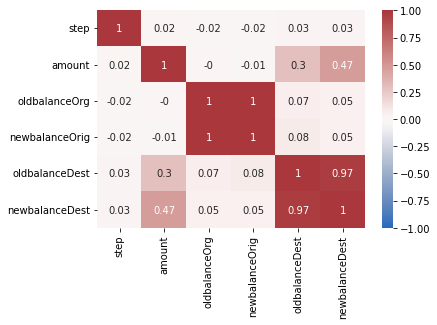

In [5]:
# https://datagy.io/python-correlation-matrix/
#Heatmap-Numeric Variables
matrix = df.corr().round(2)
#print(matrix)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
# mask = np.triu(np.ones_like(matrix, dtype=bool)) #Showing only the bottom half of our correlation matrix
#sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

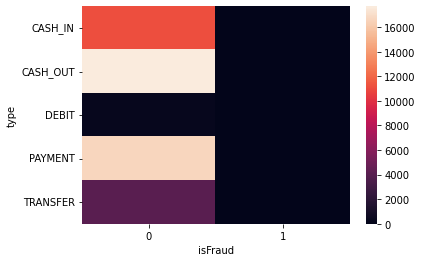

In [6]:
#Heatmap-Categorical Variables
sns.heatmap(pd.crosstab(df.type, df.isFraud))